In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

warnings.simplefilter("ignore")

In [2]:
rating = pd.read_csv("../data/ml-32m/ratings.csv")
movies = pd.read_csv("../data/ml-32m/movies.csv")

### Rating Data

In [3]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


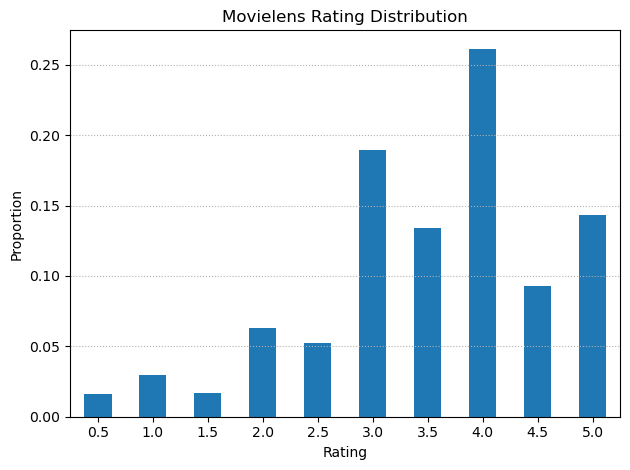

In [5]:
rating.rating.value_counts(normalize=True).sort_index().plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Rating")
plt.ylabel("Proportion")
plt.grid(True, linestyle=':', axis="y")
plt.title("Movielens Rating Distribution")
plt.tight_layout()
plt.savefig("../artifacts/plot/rating_distribution.svg", format="svg")
plt.show()

In [6]:
print("Number of movies:", rating.movieId.nunique())
print("Number of Users:", rating.userId.nunique())

Number of movies: 84432
Number of Users: 200948


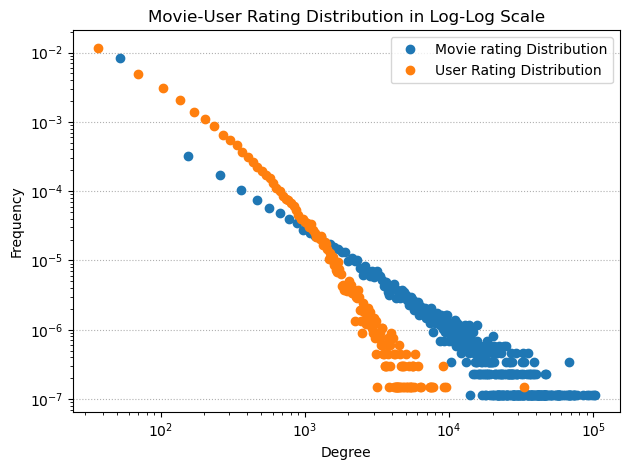

In [7]:
m_hist, m_points = np.histogram(rating.movieId.value_counts(), bins=1000, density=True)
m_points = (m_points[:-1] + m_points[1:]) / 2

u_hist, u_points = np.histogram(rating.userId.value_counts(), bins=1000, density=True)
u_points = (u_points[:-1] + u_points[1:]) / 2

plt.plot(m_points, m_hist, "o", label="Movie rating Distribution")
plt.plot(u_points, u_hist, "o", label="User Rating Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, linestyle=':', axis="y")

plt.title("Movie-User Rating Distribution in Log-Log Scale")
plt.legend()
plt.tight_layout()
plt.savefig("../artifacts/plot/power_law.svg", format="svg")
plt.show()

### Movies

In [50]:
genres = []
for g in movies.genres:
    genres += g.split("|")

genres = set(genres)

print("Distinct Genres:", len(genres))
print(genres)

Distinct Genres: 20
{'Comedy', 'Horror', 'Action', 'Crime', '(no genres listed)', 'Documentary', 'Thriller', 'Adventure', 'Drama', 'Romance', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Animation', 'Fantasy', 'Film-Noir', 'Musical', 'Western', 'Children'}


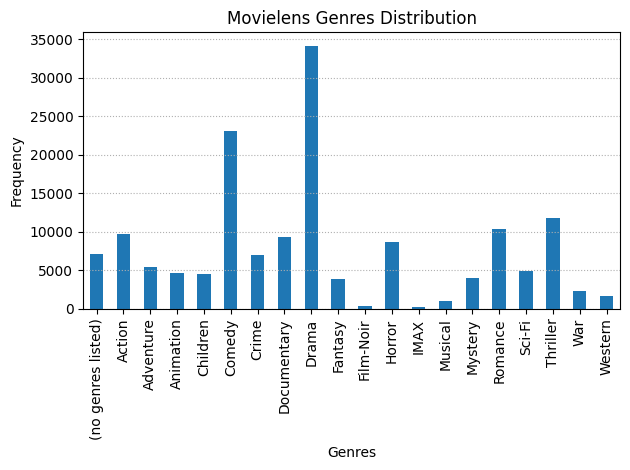

In [ ]:
for g in genres:
    movies[g] = movies.genres.apply(lambda gl: 1 if g in gl else 0)

movies[list(genres)].sum(axis=0).sort_index().plot.bar()
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.grid(True, linestyle=':', axis="y")
plt.title("Movielens Genres Distribution")
plt.tight_layout()
plt.savefig("../artifacts/plot/genres_distribution.svg", format="svg")
plt.show()